In [ ]:
# Prepare a miltinomial naivebaeys classification model for e-mail classification in to spam or nonspam.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
df = pd.read_csv("/content/spam.csv",encoding = 'latin-1') # Latin-1 encoding is used for assigning a unique numerical value to each character which includes many non ASCII characters as well
# A wordcloud in python is a visual representation of text data that uses the size and color of words to show their frequencies.
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df = df[['v1','v2']]
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df = df.rename(columns={
    'v1':'label',
    'v2':'text'
})
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# x is dependent and y is independent
x=df['text']
y=df['label']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42) # except 0 any number can take because 0 is false

In [ ]:
distribution = y.value_counts() # Value counts is used to count the number of unique values in a dataset
distribution

,count
label,
ham,4825
spam,747


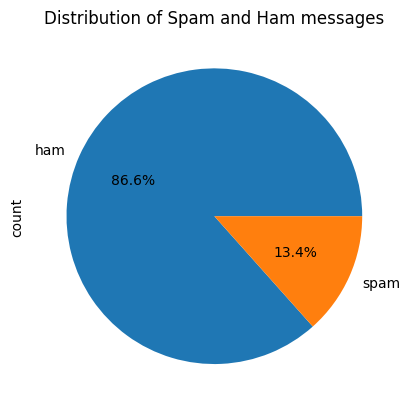

In [ ]:
distribution.plot(kind='pie',autopct='%1.1f%%') # autopct = percentage
plt.title("Distribution of Spam and Ham messages")
plt.show()

In [ ]:
# Generate word cloud for spam messages
spam_text = ' '.join(df[df['label']=='spam']['text'])
spam_text


'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'s FreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only. Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030 SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info URGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18 XXXMobileMovieClub: To use your credit, click the WAP link in the next txt messag

In [ ]:
spam_wordcloud = WordCloud(width = 800,height=400, #hyperparameters
                           max_words=100,background_color='white',
                           random_state=42
                           ).generate(spam_text) # Method
print(spam_wordcloud)

(-0.5, 799.5, 399.5, -0.5)

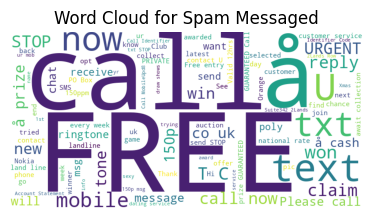

In [ ]:
# Plot the wordcloud for spam messages

plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
plt.imshow(spam_wordcloud)
plt.title("Word Cloud for Spam Messaged")
plt.axis("off")


In [ ]:
# Generate word cloud for Ham Messages
ham_text = ' '.join(df[df['label']=='ham']['text'])
ham_text

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... Ok lar... Joking wif u oni... U dun say so early hor... U c already then say... Nah I don\'t think he goes to usf, he lives around here though Even my brother is not like to speak with me. They treat me like aids patent. As per your request \'Melle Melle (Oru Minnaminunginte Nurungu Vettam)\' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune I\'m gonna be home soon and i don\'t want to talk about this stuff anymore tonight, k? I\'ve cried enough today. I\'ve been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times. I HAVE A DATE ON SUNDAY WITH WILL!! Oh k...i\'m watching here:) Eh u remember how 2 spell his name... Yes i did. He v naughty make until i v wet. Fine if thatåÕs the way u feel. ThatåÕs the wa

In [ ]:
ham_wordcloud = WordCloud(width=800,
                          height = 400,
                          max_words = 100,
                          background_color='white',
                          random_state = 42
                          ).generate(ham_text)
ham_wordcloud

(-0.5, 799.5, 399.5, -0.5)

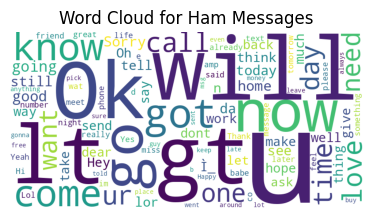

In [ ]:
# Plot the wordcloud for ham messages

plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
plt.imshow(ham_wordcloud)
plt.title("Word Cloud for Ham Messages")
plt.axis("off")

In [ ]:
# Create a CountVectorizer to convert text data into numerical features
vectorizer = CountVectorizer()

x_train = vectorizer.fit_transform(x_train) # fit_transform vs transform in the book
x_test = vectorizer.transform(x_test) # count vectorizer is a text processing technique used in natural language processing task for converting a collection of text document in to a numerical representation.

In [ ]:
# Train a multinomial Naive Bayes Classifier
model_multinomial = MultinomialNB(alpha=0.8,fit_prior=True,force_alpha = True)   #fit_prior=True: This parameter, when set to True, allows the model to learn class priors based on the training data. If False, it assumes equal class priors.
#alpha=0.8: This parameter controls the smoothing. Smoothing helps avoid zero probabilities for features that don’t appear in the training data

model_multinomial.fit(x_train,y_train)

MultinomialNB(alpha=0.8)

In [ ]:
# Train a Guassian Naive Bayes classifier

model_guassian = GaussianNB()
model_guassian.fit(x_train.toarray(),y_train)

GaussianNB()

In [ ]:
# calculating the accuracy
y_pred_multinomial = model_multinomial.predict(x_test)
accuracy_multinomial = accuracy_score(y_test,y_pred_multinomial)
print("Accuracy for multinomial is : ",accuracy_multinomial)
y_pred_guassian = model_guassian.predict(x_test.toarray())
accuracy_guassian = accuracy_score(y_test,y_pred_guassian)
print("Accuracy for Guassian Naive Bayes model is : ",accuracy_guassian)

Accuracy for multinomial is :  0.9838565022421525
Accuracy for Guassian Naive Bayes model is :  0.9004484304932735


<BarContainer object of 2 artists>

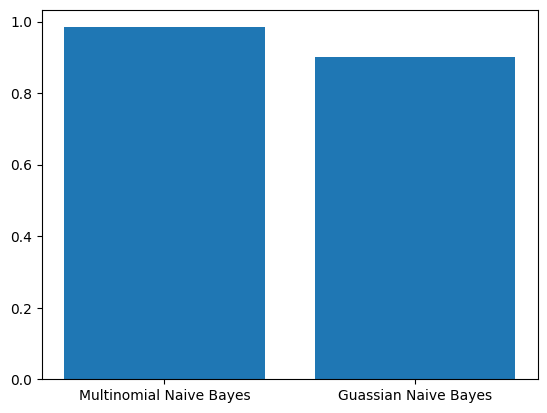

In [ ]:
methods =['Multinomial Naive Bayes','Guassian Naive Bayes']
scores = [accuracy_multinomial,accuracy_guassian]
plt.bar(methods,scores)